# Gráficos

In [84]:
import numpy as np
import matplotlib.pyplot as plt

## Gráficos Ángulo vs Tiempo

In [85]:
datos = np.genfromtxt("\\Users\\Catazla\\Desktop\\Lab I\\Datos\\datos carrito.txt")
theta = datos[:,0] #ángulos tomados
tiempo = datos[:,1] #tiempo del carrito

In [86]:
#Promedio de los Tiempos para cada Ángulo
mean = np.array([])
for i in range(8):
    mean = np.append(mean, np.mean(datos[i*10:(i+1)*10,1]))
print(mean) 

[2.885 1.479 1.148 0.78  0.837 0.812 0.623 0.629]


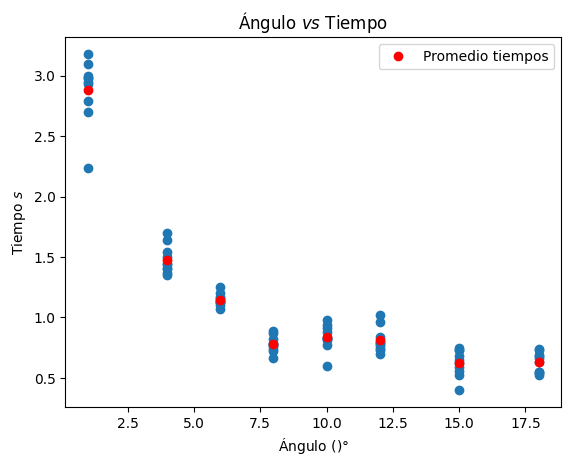

In [87]:
#Gráfico AvsT
plt.scatter(theta,tiempo)
a = [1, 4, 6, 8, 10, 12, 15, 18]
plt.errorbar(a,mean, fmt='o', color='red',lw=2, label="Promedio tiempos")
plt.xlabel("Ángulo $()°$")
plt.ylabel("Tiempo $s$")
plt.title("Ángulo $vs$ Tiempo")
plt.legend()

In [88]:
#Cálculo de 1/(sin(theta))^(1/2)
q = np.array([])
for i in range(len(a)):
    x = np.sqrt(np.sin(np.pi*a[i]/180))
    q = np.append(q, (1/x))
print(q)

[7.56958972 3.78623653 3.09301992 2.68054034 2.39974384 2.19311065
 1.96563051 1.79890744]


In [89]:
#Generamos una pendiente por el método de mínimos cuadrados
a1 = np.dot(q, mean) / np.dot(q, q)
print(a1)

0.36985857266197136


In [90]:
#Desviación estándar para cada Tiempo Promedio
error = np.array([])
for i in range(8):
    sigma = np.sqrt(np.sum((datos[i*10:(i+1)*10,1]-mean[i])**2)/8)
    error = np.append(error,sigma)
print(error)

[0.28063544 0.1232325  0.0538052  0.07245688 0.11180899 0.10883474
 0.11640984 0.08809796]


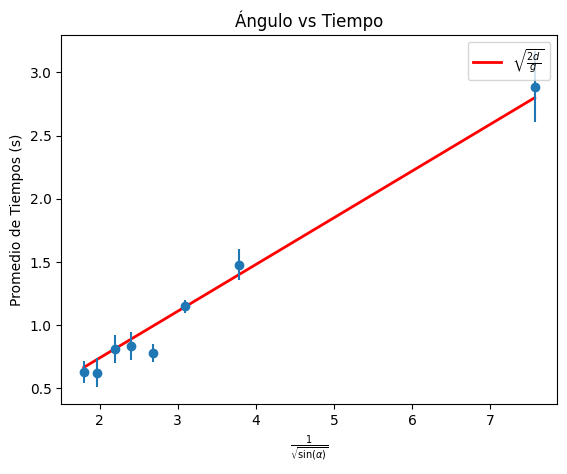

In [91]:
s=a1*q
plt.plot(q,s, color='red',lw=2, label=r"$\sqrt{\frac{2d}{g}}$")
plt.errorbar(q, mean, yerr = error, fmt ='o')
plt.xlabel(r"$\frac{1}{\sqrt{\sin(\alpha)}}$")
plt.ylabel("Promedio de Tiempos (s)")
plt.title("Ángulo vs Tiempo")
plt.legend()

## Gráfico Masa vs Distancia

In [92]:
datos = np.genfromtxt("\\Users\\Catazla\\Desktop\\Lab I\\Datos\\datos_resorte.txt")
m = datos[:,0] #masa
x = datos[:,1] #distancia

In [93]:
#Cambio de Unidad de Medida para la Distancia
x_m = np.array([])
for i in range(14):
    x[i]= x[i]/100
    x_m = np.append(x_m, x[i])
print(x_m)

[0.075 0.154 0.311 0.009 0.003 0.249 0.102 0.004 0.355 0.053 0.023 0.03
 0.236 0.128]


In [94]:
#Cambio de Unidad de Medida para la Masa
m_kg = np.array([])
for i in range(14):
    m[i]= m[i]/1000
    m_kg = np.append(m_kg, m[i])
print(m_kg)


[0.25   0.4997 0.9996 0.0477 0.0258 0.7975 0.3399 0.0406 1.1228 0.1872
 0.09   0.1054 0.7497 0.4168]


In [95]:
#Desviación estándar para cada Distancia
ror = np.array([])
for i in range(14):
    sig = np.sqrt(np.sum((x_m[i]-np.mean(x_m))**2)/14)
    ror = np.append(ror,sig)
print(ror)

[0.01301944 0.0080942  0.05005421 0.03065868 0.03226225 0.03348402
 0.00580339 0.03199499 0.06181371 0.01889919 0.02691703 0.0250462
 0.03000962 0.00114541]


In [96]:
#Definimos una recta con el método de mínimos cuadrados
a01 = np.dot(m_kg, x_m) / np.dot(m_kg, m_kg)
k = a01*m_kg

0.3119112030225915


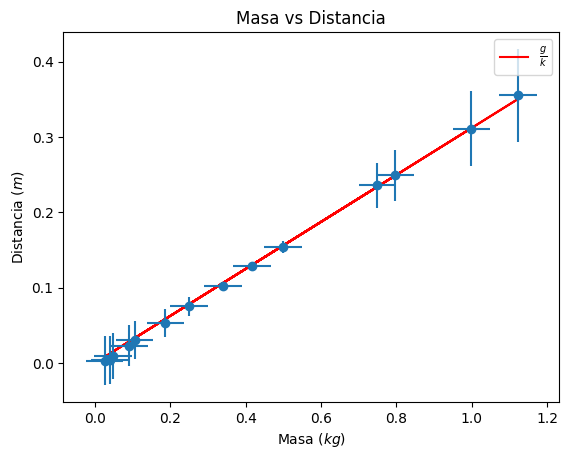

In [97]:
#Gráfico Masa vs Distancia
plt.plot(m_kg,k, color='red', label=r"$\frac{g}{k}$")
plt.errorbar(m_kg,x_m, xerr= 0.05, yerr=ror, fmt='o')
plt.xlabel("Masa $(kg)$")
plt.ylabel("Distancia $(m)$")
plt.title("Masa vs Distancia")
plt.legend()
print(a01)